<a href="https://colab.research.google.com/github/kapibara3chi/LSTM_test/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.pip

In [1]:
!pip install keras
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install yfinance

# code

出来高を考慮した予測

始値、安値、高値を考慮した予測

[*********************100%%**********************]  1 of 1 completed


              Open    High     Low   Close    Adj Close   Volume
Date                                                            
2018-01-01  1423.0  1423.0  1423.0  1423.0  1361.207886        0
2018-01-02  1423.0  1423.0  1423.0  1423.0  1361.207886        0
2018-01-03  1423.0  1423.0  1423.0  1423.0  1361.207886        0
2018-01-04  1482.5  1622.5  1479.0  1610.0  1540.087280  3264200
2018-01-05  1627.5  1725.0  1620.0  1725.0  1650.093506  2724600
scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data 
[[0.00391624]
 [0.00391624]
 [0.00391624]
 ...
 [0.99224026]
 [0.9881179 ]
 [0.99030033]]
training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len 
1075
train_data.shapetrain_data.shapetrain_data.shapetrain_data.shapetrain_data.shapetrain_data.shapetrain_data.shapetrain_data.shapetrain_data.shapetrai

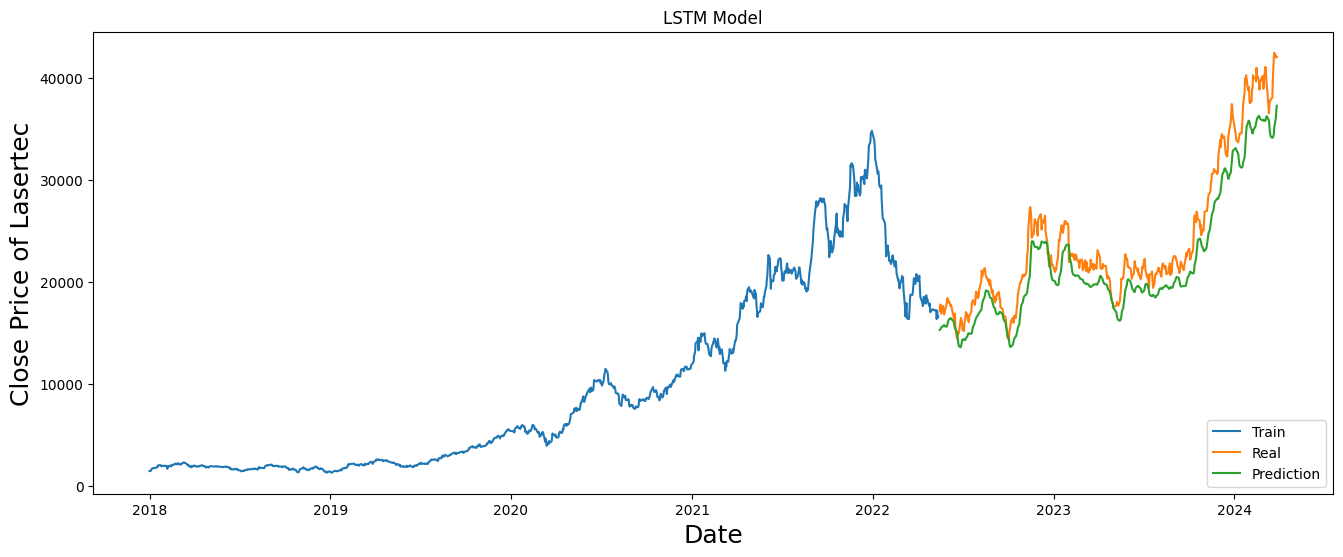

In [ ]:
import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SPXL",start='2018-01-01',end = datetime.now(),interval="1d")
print(df.head())

#　Closeコラムのみ抽出
data = df.filter(["Low"])
dataset = data.values
#　データの正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print("scaled_data "*10)
print(scaled_data)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.7))
print("training_data_len "*10)
print(training_data_len)

train_data = scaled_data[0: int(training_data_len), :]
print("train_data.shape"*10)
print(train_data.shape)

#訓練データの取得
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
print("x_train.shape"*10)
print(x_train.shape)


# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM

#LSTMモデル構築
model = Sequential()
model.add(LSTM(128,return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

#訓練用モデル構築
model.fit(x_train, y_train, batch_size = 1, epochs =1)

# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
for i in range(60, len(test_data)):
   x_test.append(test_data[i-60:i,0])
y_test = dataset[training_data_len:, :]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

# 予測値の算出
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# RMSEを利用して予測精度を確認
from sklearn.metrics import mean_squared_error
test_score = np.sqrt(mean_squared_error(y_test,predictions))
print('Test Score: %.2f RMSE' % (test_score))

train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price of Lasertec', fontsize =18)
plt.plot(train['Low'])
plt.plot(valid[['Low','Predictions']])
plt.legend(['Train','Real','Prediction'], loc='lower right')
plt.show()